In [1]:
import pandas as pd
import numpy as np
import math
import os
from test_class import Test
os.environ['PYTHONHASHSEED'] = str(50)
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

In [2]:
def bin_append(set_ree, count, pset_size):
    intersect_val = 1
    subset = []

    while(intersect_val < pset_size):
        if count & intersect_val:
            index = int(math.log(intersect_val, 2))
            subset.append(set_ree[index])
        
        intersect_val *= 2

    return subset

def gen_power_set(set_ree):
    power = []
    count = 0

    pset_size = int(2 ** len(set_ree))

    for i in range(pset_size):
        power.append(bin_append(set_ree, count, pset_size))
        count = count + 1

    power.sort(key = lambda x : len(x))
    return power

In [3]:
rounds = 50
dataset = pd.read_csv('RTT_data.csv')
data_args = {
    'data seed': 11,
    'distance clients': [0, 2, 3, 6],
    'distance augments': [0.5, 0.5, 0.5, 0.5],
    'tolerance': 5,
    'exclude dtypes': 'object',
    'drop labels': ['GroundTruthRange[m]'],
    'target labels': ['GroundTruthRange[m]'],
    'test size 1': 0.2,
    'test size 2': 0.25
}

Mt = (np.ones(rounds) * 5).astype('int32')
model_seed = 50
test = Test(dataset, data_args, Mt, model_seed)

In [4]:
test.split(scheme = 2)
test.display_metadata()

Number of samples: 29581
Features per sample: 10

Columns:
%Timestamp[s], GroundTruthPositionX[m], GroundTruthPositionY[m], GroundTruthPositionZ[m], ML_range_estimate[m], AP_positionX[m], AP_positionY[m], AP_positionZ[m], AP_index, ToD_factor[m]

Clients: 12
Total Client Training Samples: 17742 (59.98%)
Total Client Training Labels: 17742
Total Validation Samples: 5921 (20.02%)
Total Validation Labels: 5921
Total Test Samples: 5918 (20.01%)
Total Test Labels: 5918


In [5]:
test.display_client_distribution()

Data Distribution
Client 1: 10.37%
Client 2: 10.20%
Client 3: 7.93%
Client 4: 8.17%
Client 5: 7.02%
Client 6: 7.50%
Client 7: 10.61%
Client 8: 9.86%
Client 9: 9.97%
Client 10: 8.98%
Client 11: 4.49%
Client 12: 4.92%

Distance Distribution w.r.t. Max Distance
Client 1: 68.42%
Client 2: 1.13%
Client 3: 84.83%
Client 4: 100.00%
Client 5: 24.36%
Client 6: 28.14%
Client 7: 58.71%
Client 8: 28.25%
Client 9: 54.60%
Client 10: 49.32%
Client 11: 42.32%
Client 12: 6.30%


In [15]:
w, b, fedavg_test_mse, fedavg_log = test.run_fedavg_test(rounds = rounds, frac_clients = (5/12))
log_path = 'history/important baselines/fedavg_log_5_scheme2.npy'
test_path = 'history/important baselines/fedavg_test_mse_5_scheme2.npy'
np.save(log_path, fedavg_log)
np.save(test_path, fedavg_test_mse)
test.load_baseline_fedavg_data(test_path, log_path)

Round 5
Round 10
Round 15
Round 20
Round 25
Round 30
Round 35
Round 40
Round 45
Round 50


In [16]:
base_avg = test.average_error((w, b), 0)
base_avg

Avg Error: 3.1144804866589912


In [7]:
a_search = np.logspace(-3, 3, 7)
l_search = np.logspace(-3, 3, 7)
gs_wb_history = test.confeddi_gs(a_search, l_search, rounds = rounds, context = [0, 3])

Training Model 1
Round 5
Round 10
Round 15
Round 20
Round 25
Round 30
Round 35
Round 40
Round 45
Round 50

Training Model 2
Round 5
Round 10
Round 15
Round 20
Round 25
Round 30
Round 35
Round 40
Round 45
Round 50

Training Model 3
Round 5
Round 10
Round 15
Round 20
Round 25
Round 30
Round 35
Round 40
Round 45
Round 50

Training Model 4
Round 5
Round 10
Round 15
Round 20
Round 25
Round 30
Round 35
Round 40
Round 45
Round 50

Training Model 5
Round 5
Round 10
Round 15
Round 20
Round 25
Round 30
Round 35
Round 40
Round 45
Round 50

Training Model 6
Round 5
Round 10
Round 15
Round 20
Round 25
Round 30
Round 35
Round 40
Round 45
Round 50

Training Model 7
Round 5
Round 10
Round 15
Round 20
Round 25
Round 30
Round 35
Round 40
Round 45
Round 50

Training Model 8
Round 5
Round 10
Round 15
Round 20
Round 25
Round 30
Round 35
Round 40
Round 45
Round 50

Training Model 9
Round 5
Round 10
Round 15
Round 20
Round 25
Round 30
Round 35
Round 40
Round 45
Round 50

Training Model 10
Round 5
Round 10
Ro

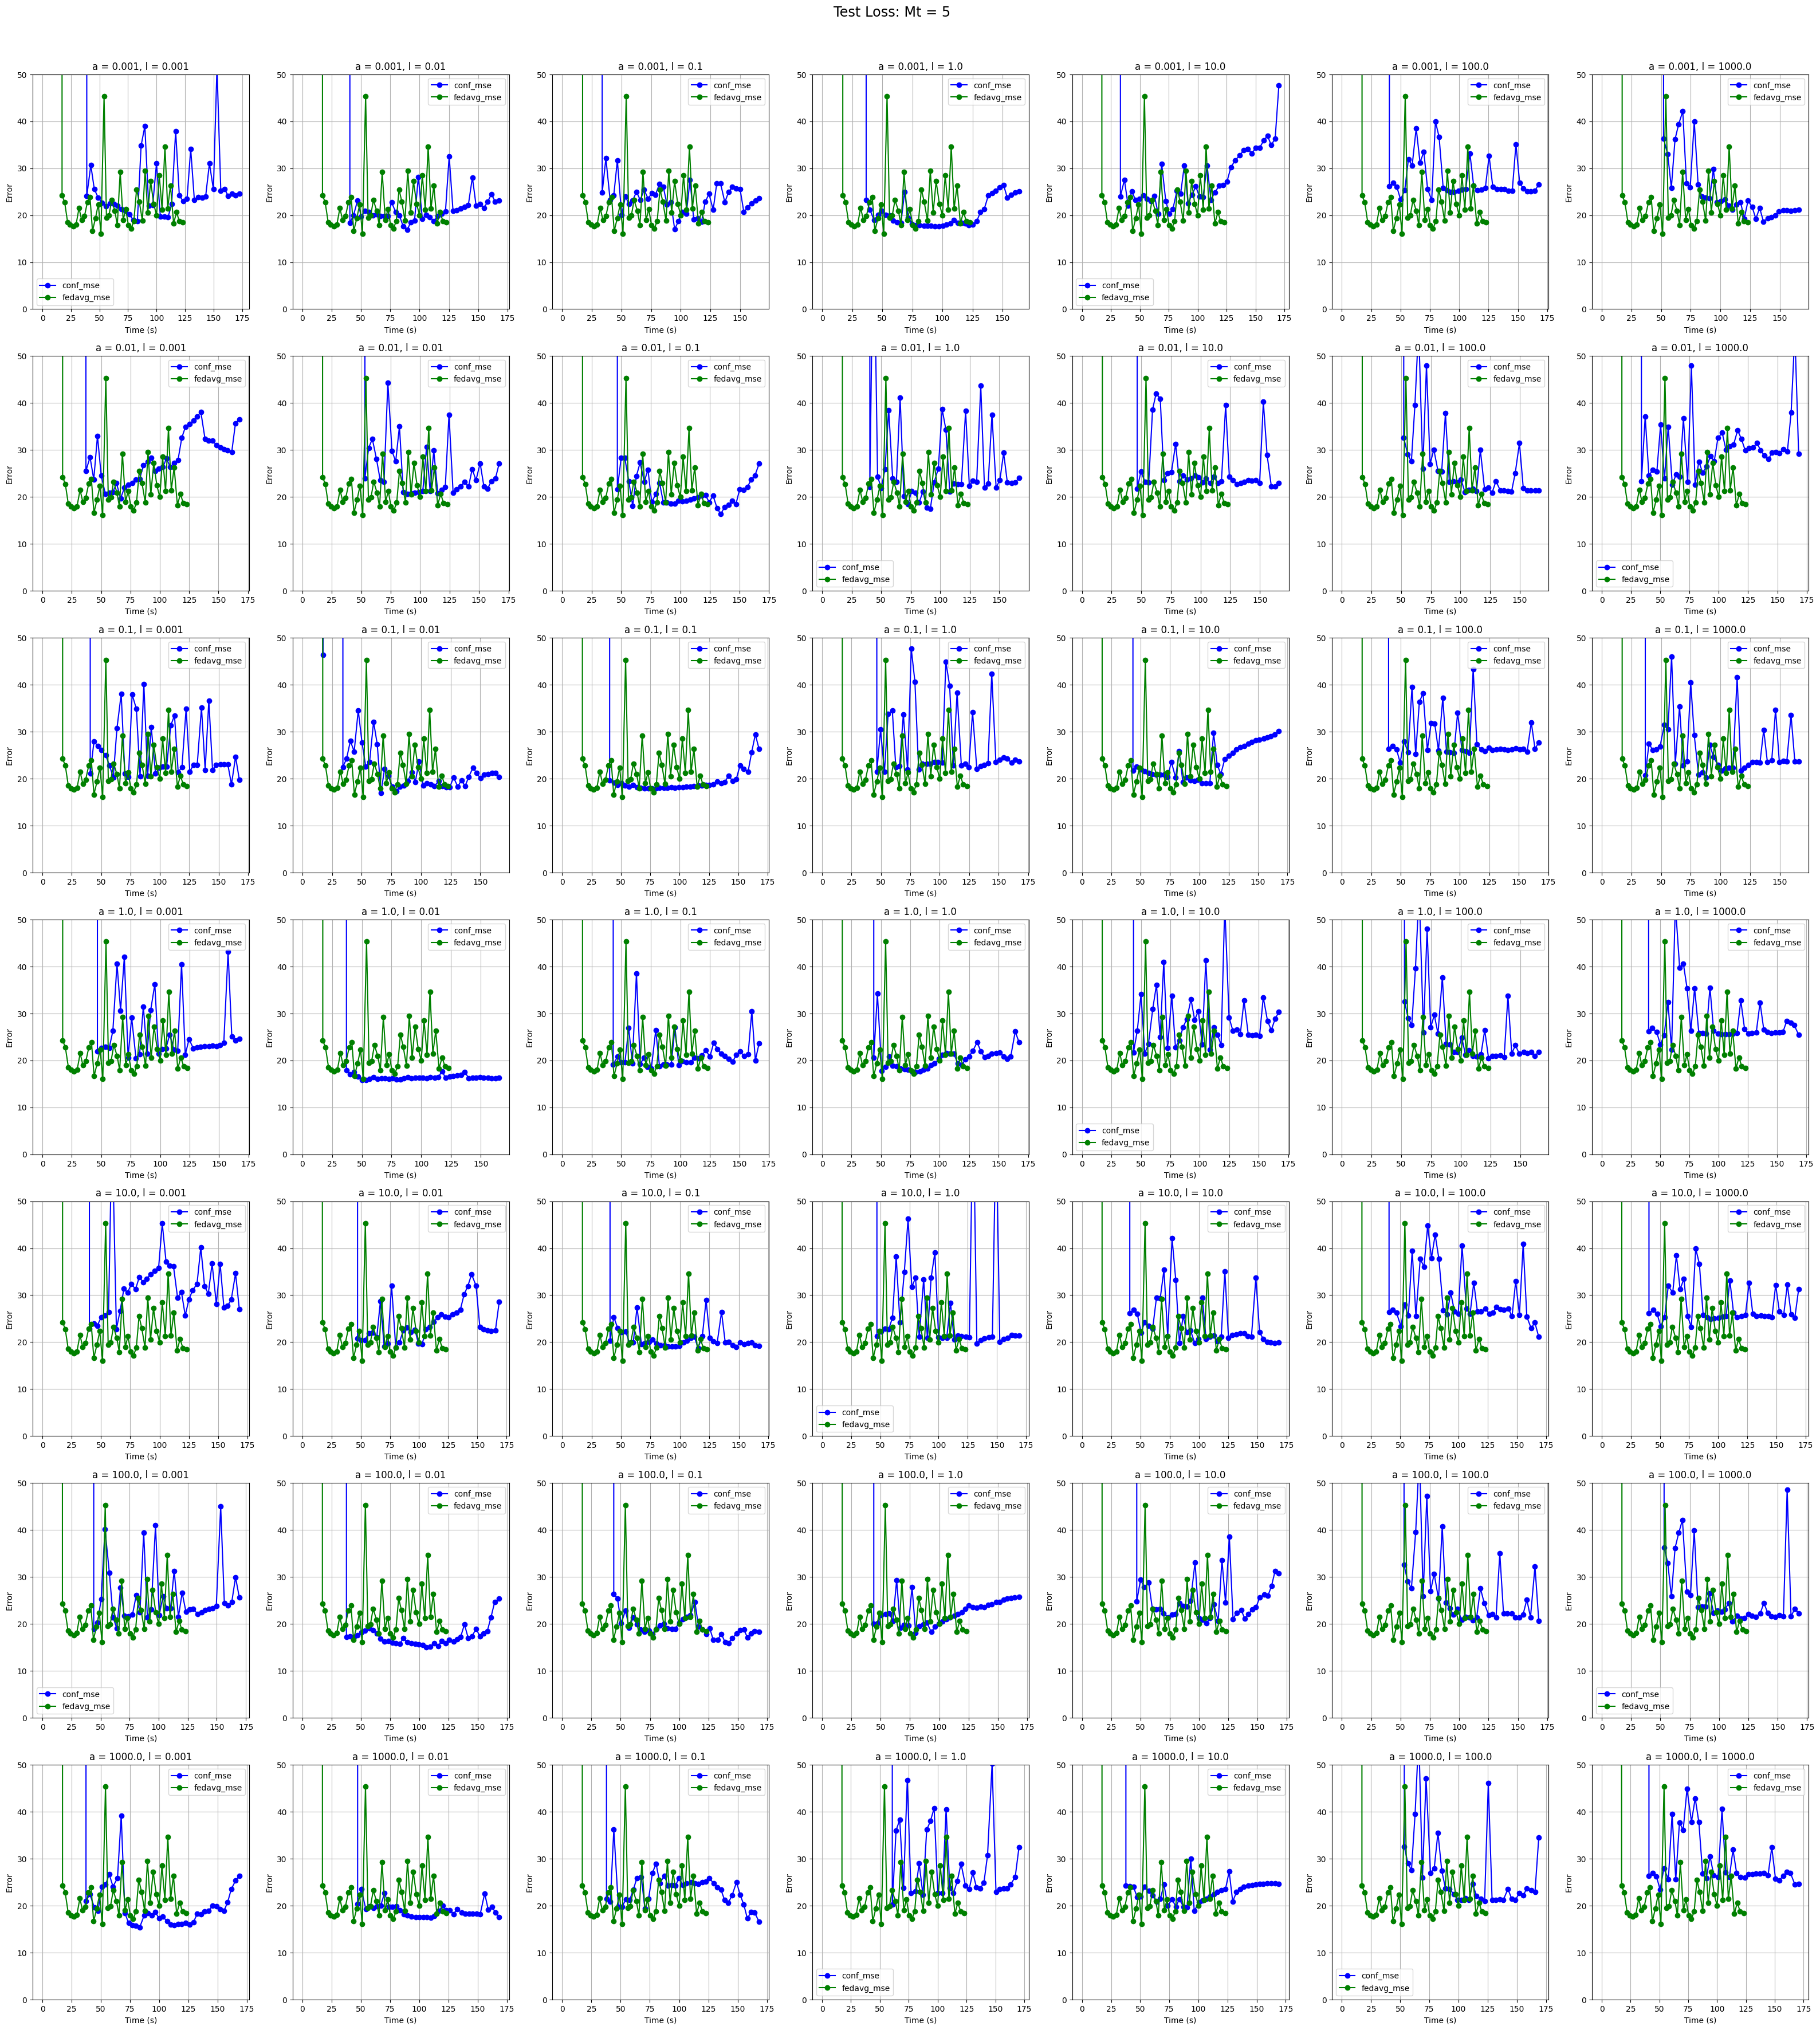

In [8]:
test.confeddi_gs_test_plots((40, 40), (0, 50))

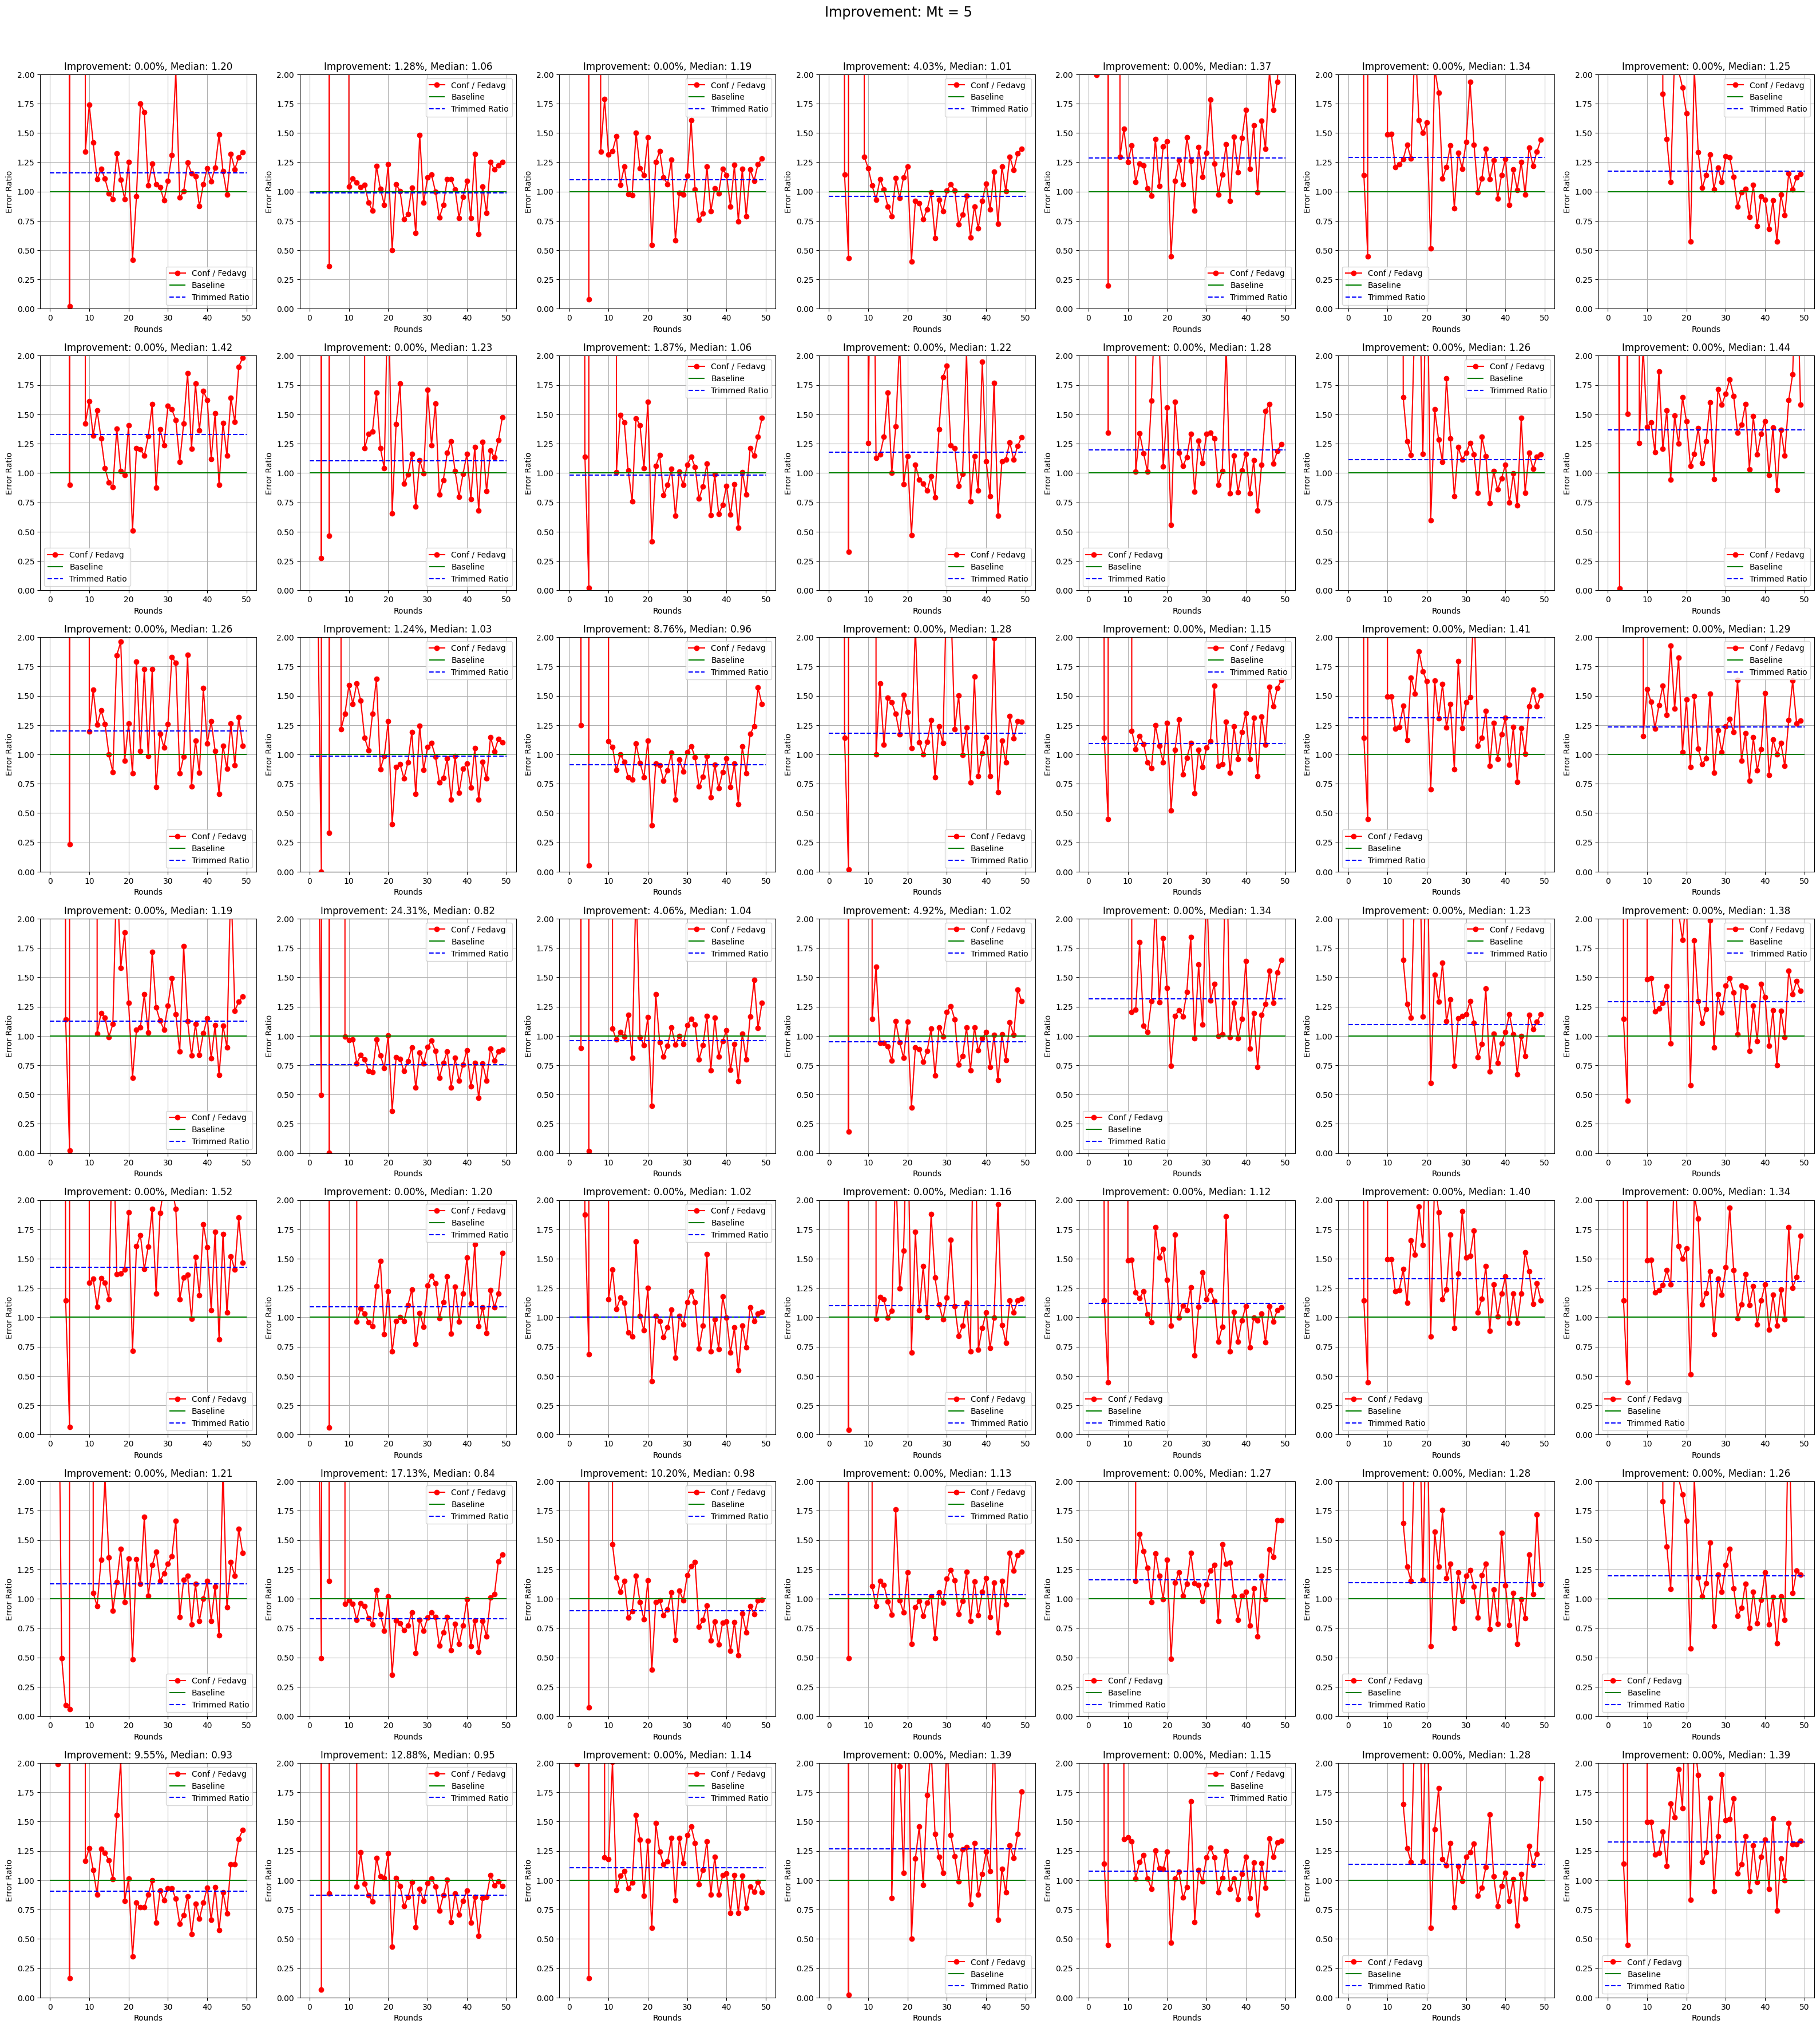

In [9]:
test.confeddi_gs_improvement_plots((40, 40), ylim = (0, 2), trim_bias = 1)

In [14]:
for w, b in gs_wb_history.values():
    test.average_error((w, b), 0)

Avg Error: 3.69187861090395
Avg Error: 3.5866168333665476
Avg Error: 3.4173709677929582
Avg Error: 3.6718702494015933
Avg Error: 5.547574849524805
Avg Error: 4.125382058098904
Avg Error: 3.4750533045888967
Avg Error: 4.349995262872904
Avg Error: 3.9500703058161672
Avg Error: 3.794587658805808
Avg Error: 3.644824218648264
Avg Error: 3.705506537953609
Avg Error: 3.4605393079628697
Avg Error: 3.8901745120309874
Avg Error: 3.3646963941001222
Avg Error: 3.2919705423646266
Avg Error: 3.890310507195236
Avg Error: 3.672512680217704
Avg Error: 3.8636271587110955
Avg Error: 4.179304532255135
Avg Error: 3.652901882031908
Avg Error: 3.730228506812481
Avg Error: 2.8133402244475616
Avg Error: 3.4137876728613668
Avg Error: 3.5832109742960894
Avg Error: 4.226112114308086
Avg Error: 3.5473734135118202
Avg Error: 3.9222883879912236
Avg Error: 3.93477966568468
Avg Error: 3.957616498696585
Avg Error: 3.2639200578355645
Avg Error: 3.497834847321121
Avg Error: 3.3090897230432152
Avg Error: 3.344683029876351

In [17]:
# Note: higher exploration strength doesn't perform as well as expected
alpha = [1]
lmbda = [0.01]
as_histories = []
wb_histories = []
context_combinations = [x for x in gen_power_set([0, 1, 2, 3, 4]) if x != []]

In [18]:
for a, l in zip(alpha, lmbda):
    wb_history = test.confeddi_as(context_combinations, a, l, rounds = 50)
    as_histories.append(test.conf_as_history)
    wb_histories.append(wb_history)

Training Model 1
Round 5
Round 10
Round 15
Round 20
Round 25
Round 30
Round 35
Round 40
Round 45
Round 50

Training Model 2
Round 5
Round 10
Round 15
Round 20
Round 25
Round 30
Round 35
Round 40
Round 45
Round 50

Training Model 3
Round 5
Round 10
Round 15
Round 20
Round 25
Round 30
Round 35
Round 40
Round 45
Round 50

Training Model 4
Round 5
Round 10
Round 15
Round 20
Round 25
Round 30
Round 35
Round 40
Round 45
Round 50

Training Model 5
Round 5
Round 10
Round 15
Round 20
Round 25
Round 30
Round 35
Round 40
Round 45
Round 50

Training Model 6
Round 5
Round 10
Round 15
Round 20
Round 25
Round 30
Round 35
Round 40
Round 45
Round 50

Training Model 7
Round 5
Round 10
Round 15
Round 20
Round 25
Round 30
Round 35
Round 40
Round 45
Round 50

Training Model 8
Round 5
Round 10
Round 15
Round 20
Round 25
Round 30
Round 35
Round 40
Round 45
Round 50

Training Model 9
Round 5
Round 10
Round 15
Round 20
Round 25
Round 30
Round 35
Round 40
Round 45
Round 50

Training Model 10
Round 5
Round 10
Ro

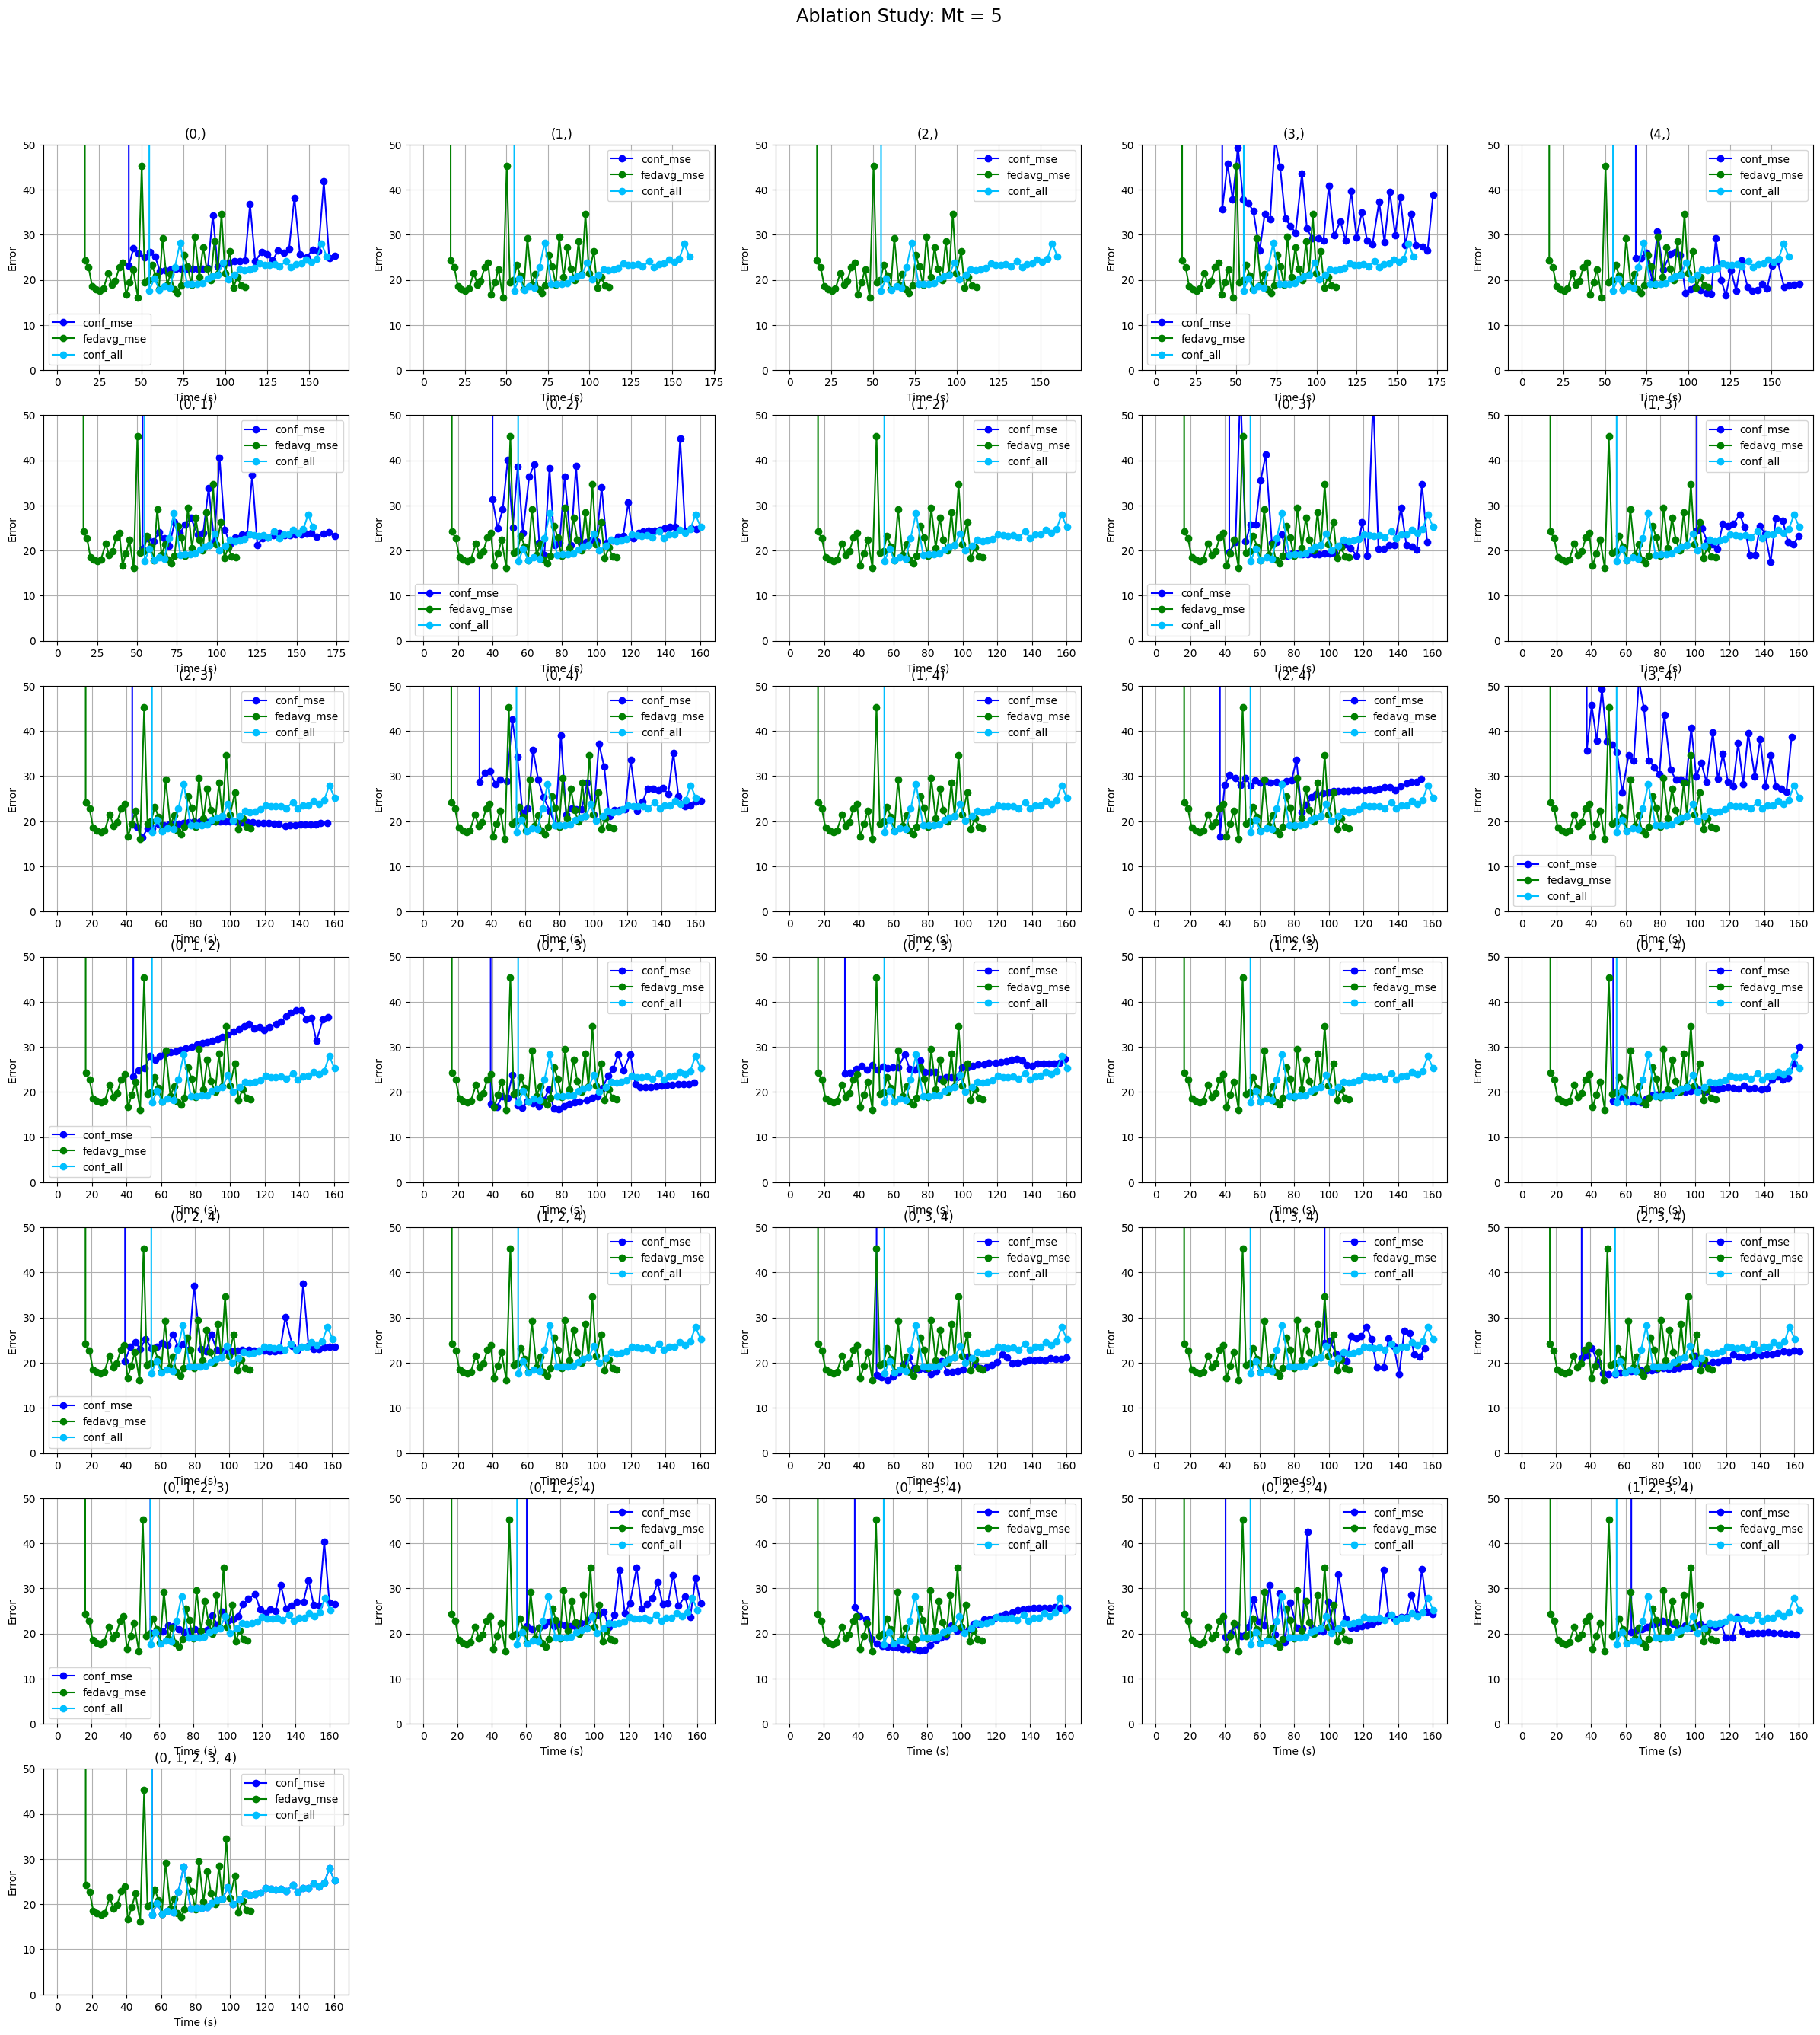

In [19]:
# a = 0.001, l = 1
test.conf_as_history = as_histories[0]
test.confeddi_as_test_plots((30, 30), (0, 50), 7, 5)

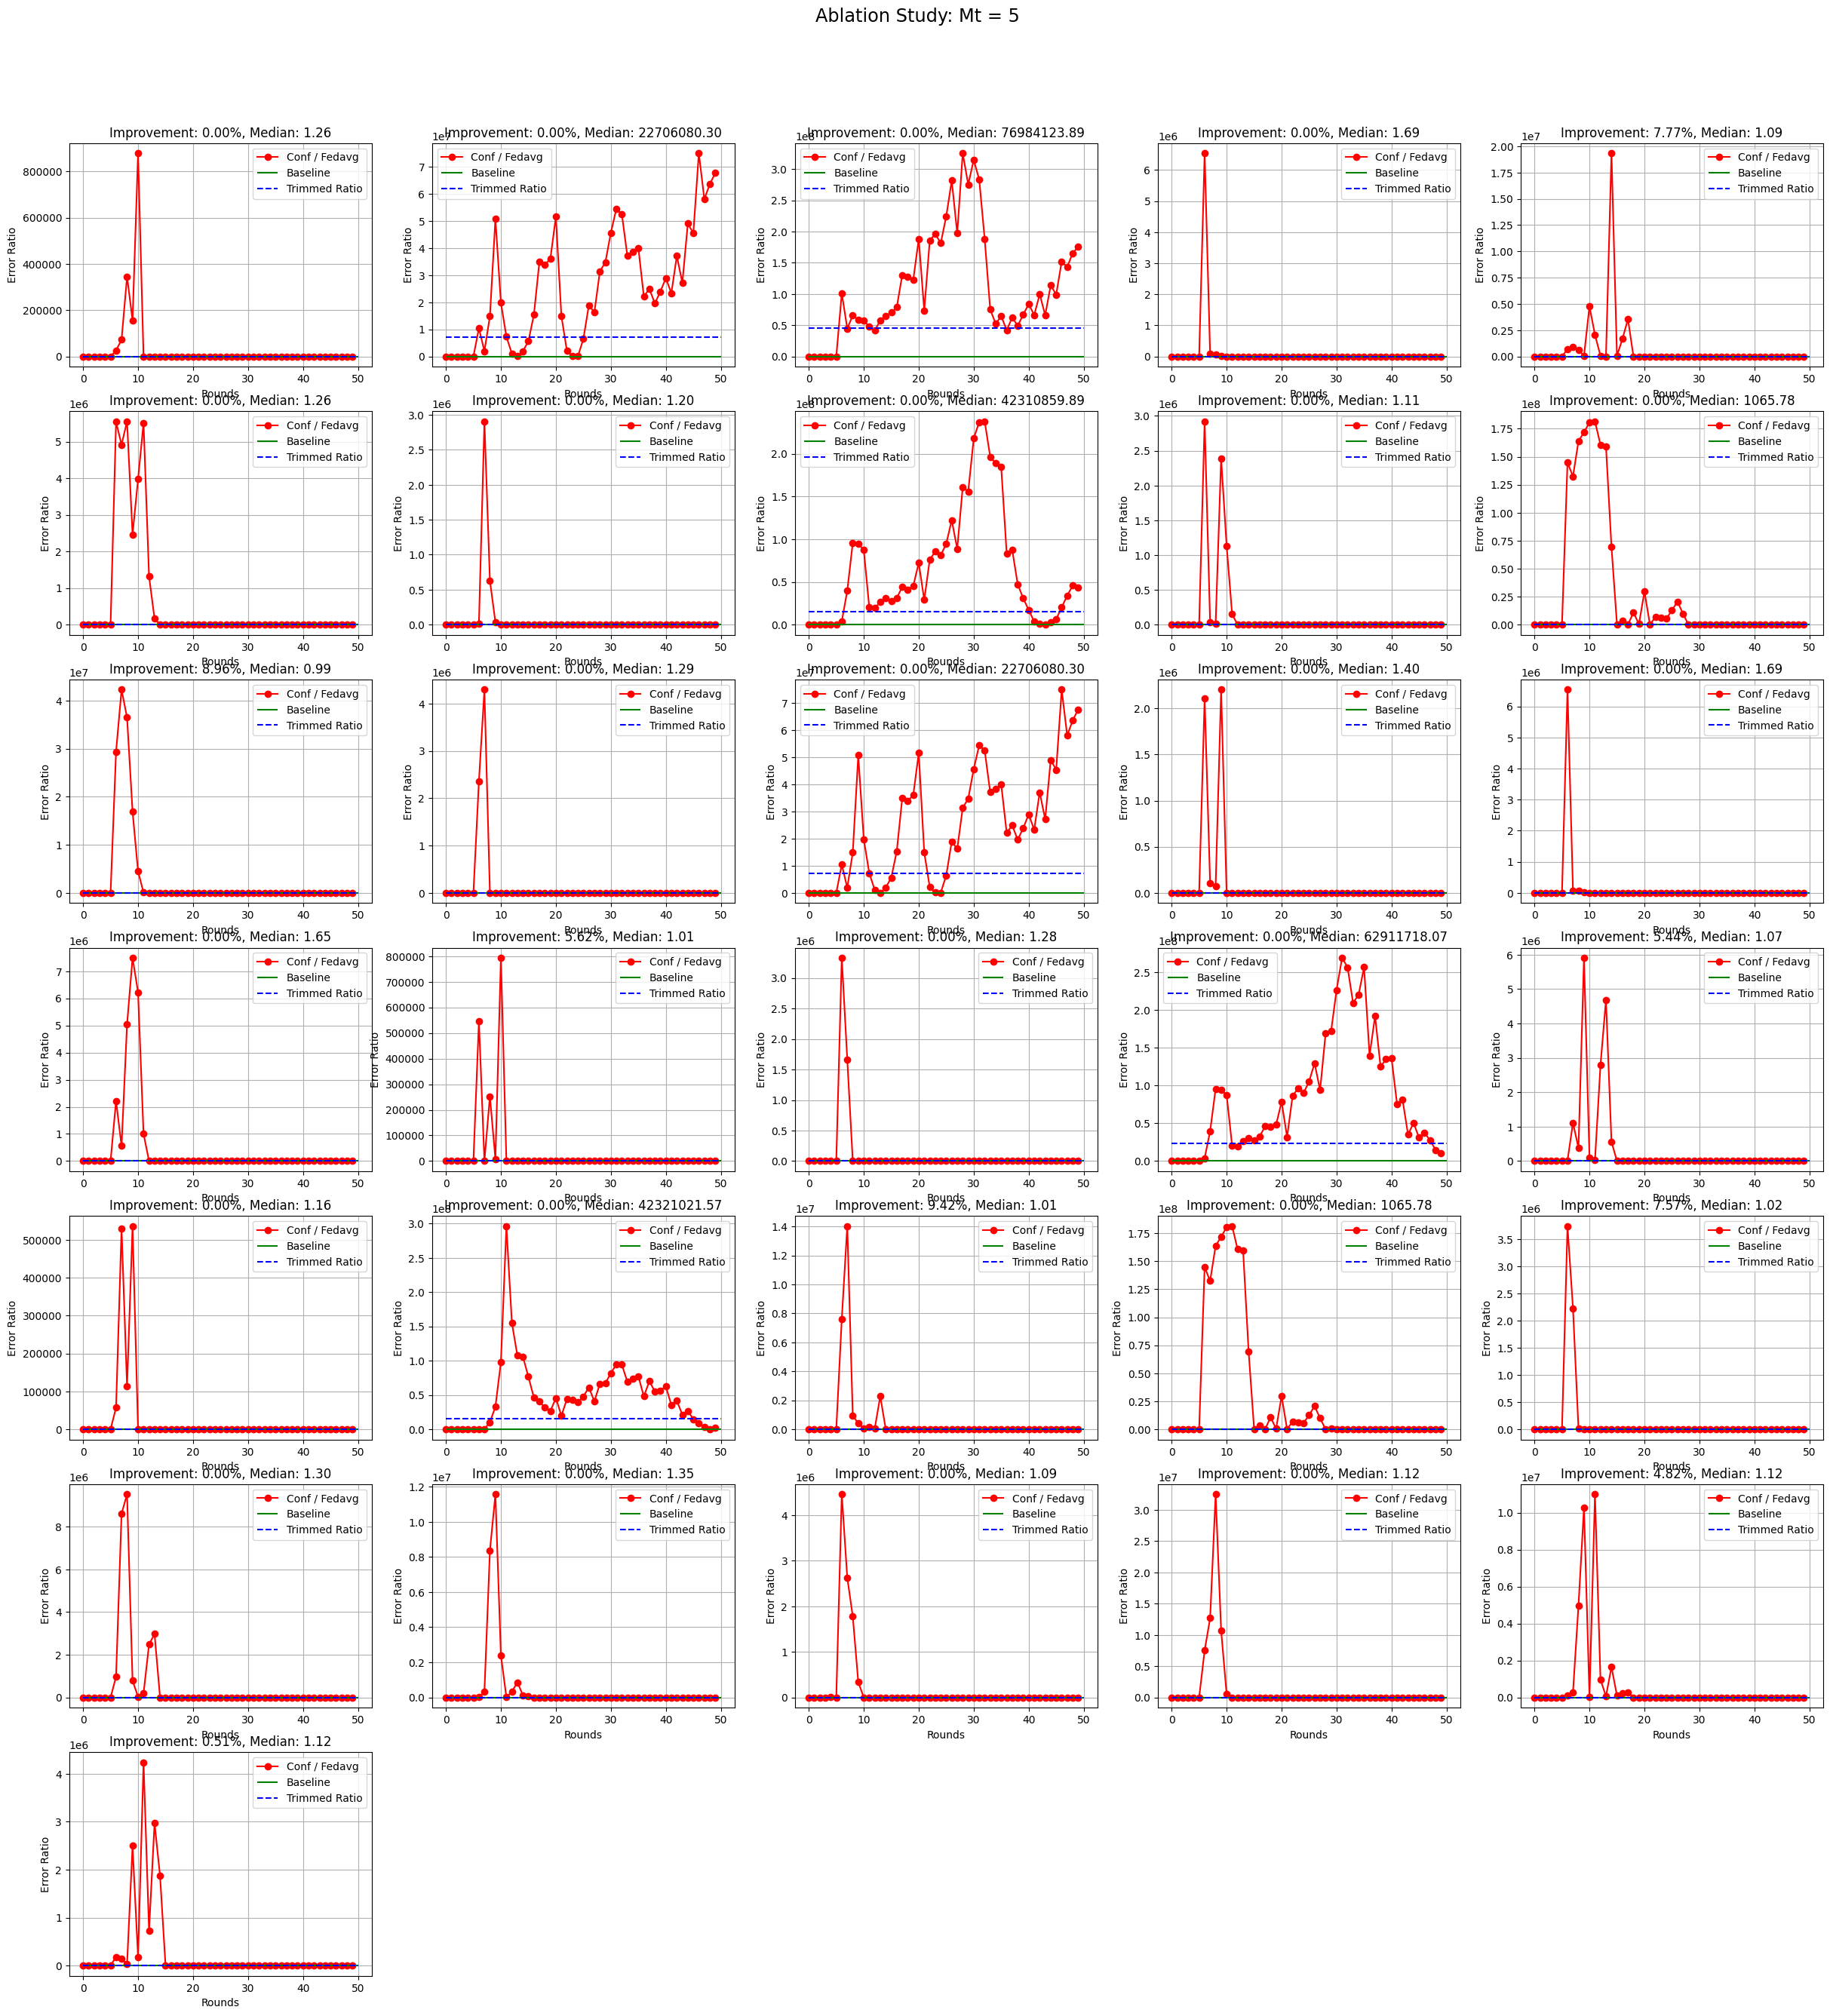

In [20]:
test.confeddi_as_improvement_plots((30, 30), 7, 5, trim_bias = 1)

In [21]:
for w, b in wb_histories[0].values():
    test.average_error((w, b), 0)

Avg Error: 3.721655125590804
Avg Error: 1128.535576951589
Avg Error: 1813.6082186791145
Avg Error: 5.043633104514861
Avg Error: 3.2324847727798263
Avg Error: 3.6533183207560618
Avg Error: 3.7539348595871527
Avg Error: 904.4188014112009
Avg Error: 3.4829402640994687
Avg Error: 3.564260700683113
Avg Error: 3.2408373924311165
Avg Error: 3.7722113628339717
Avg Error: 1128.535576951589
Avg Error: 4.004094732230906
Avg Error: 5.043633104514861
Avg Error: 4.164008968268716
Avg Error: 3.362314727692099
Avg Error: 3.7840108521264293
Avg Error: 439.13309464789
Avg Error: 4.088015201843912
Avg Error: 3.6080551398413374
Avg Error: 215.04957457963604
Avg Error: 3.2397380539664433
Avg Error: 3.564260700683113
Avg Error: 3.5187799367237136
Avg Error: 3.767738078155882
Avg Error: 3.8532986456075573
Avg Error: 3.425178988197769
Avg Error: 3.6554458326999715
Avg Error: 3.301096836040857
Avg Error: 3.652735658371163


In [ ]:
#a = 1, l = .01
#(0, 3), all